<a href="https://colab.research.google.com/github/marcusyeoyh/SC1007-Data-Structures-and-Algo/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS2001 Algorithms Design and Analysis 

---
Class Group: Z53

Members
- Marcus Yeo
- Chang Dao Zheng
- Mohamed Nur Hazim Bin Mohamed Ghazali
---
## Project 1:  Integration of Mergesort & Insertion Sort
In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

(a) Algorithm implementation: Implement the above hybrid algorithm.

(b) Generate input data: Generate arrays of increasing sizes, in a range from
1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

(c) Analyze time complexity: Run your program of the hybrid algorithm on the
datasets generated in Step (b). Record the number of key comparisons
performed in each case.

> i. With the value of S fixed, plot the number of key comparisons over
different sizes of the input list n. Compare your empirical results with
your theoretical analysis of the time complexity.

> ii. With the input size n fixed, plot the number of key comparisons over
different values of S. Compare your empirical results with your
theoretical analysis of the time complexity.

>iii. Using different sizes of input datasets, study how to determine an
optimal value of S for the best performance of this hybrid algorithm.

(d) Compare with original Mergesort: Implement the original version of
Mergesort (as learnt in lecture). Compare its performance against the above
hybrid algorithm in terms of the number of key comparisons and CPU times on
the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

# Importing relevant libraries for the execution of code

In [ ]:
#External Libraries
import numpy as np 
import math
import random 
from datetime import datetime
import matplotlib.pyplot as plt

#Part a: Algorithm implementation: Implement the above hybrid algorithm.

## ai: Implementing Insertion Sort function

In [ ]:
def insertionSort(arr,count):
    length = len(arr)
    # print(length)
    for i in range(1,length, +1):
        j = i-1
        while j >=0:
            if arr[i] < arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
                i-=1
                count[0] += 1
            else: 
              count[0] += 1
              break
            j-=1
    return arr

## aii: Implementing Merge Sort Function

In [ ]:
def merge(arr1, arr2, count):
    result = []
    while len(arr1)!=0 and len(arr2)!=0:
        if (arr1[0] < arr2[0]):
            result.append(arr1[0])
            arr1.pop(0)
            
        elif (arr2[0] < arr1[0]):
            result.append(arr2[0])
            arr2.pop(0)
            
        else:
            result.append(arr2[0])
            result.append(arr1[0])
            arr2.pop(0)
            arr1.pop(0)
        count[0] += 1
            
    if len(arr1)!=0:
        result.extend(arr1)
    elif len(arr2)!=0:
        result.extend(arr2)
    return result

In [ ]:
def mergeSort(arr, count):
    if len(arr) <=1:
        return arr
    midpoint = math.floor((len(arr))/2)
    arr1 = mergeSort(arr[:midpoint], count)
    arr2 = mergeSort(arr[midpoint:], count)
    return merge(arr1, arr2, count)

## aiii: Implementing Hybrid Sort Function

The hybrid sort function takes in an array like the other 2 sorting functions. On top of that, is also takes in parameter S, which is the limit for our hybridSort function. 

If array size is smaller or equal to the limit S, insertion sort will be used. 

However, if array size is large than limit S, merge will be used instead. 

In this way, we can leverage on the optimal array size for each sorting algorithm.

In [ ]:
def hybridSort(arr, S, count):
    if len(arr)<=S:
        return insertionSort(arr, count)
    else:
        midpoint = math.floor((len(arr))/2)
        arr1 = hybridSort(arr[:midpoint], S, count)
        arr2 = hybridSort(arr[midpoint:], S, count)
        return merge(arr1, arr2, count)

# Part b: Generate input data:

Generating arrays of increasing sizes (5 to 20) with integers from 0 to n-1 in random order

Generating 10 arrays from 1,000 to 10,000,000. Each array has non-duplicated integers from 0 to n-1, where n is the size of the array.

In [ ]:
for i in range(0, 20, +1):
  arr = random.sample(range(0,i), i)
  print(arr)

[]
[0]
[0, 1]
[1, 2, 0]
[3, 1, 0, 2]
[1, 2, 3, 4, 0]
[2, 5, 1, 0, 3, 4]
[0, 3, 2, 5, 4, 1, 6]
[6, 1, 0, 5, 4, 2, 7, 3]
[5, 6, 0, 2, 3, 7, 4, 1, 8]
[0, 5, 9, 7, 1, 6, 2, 4, 8, 3]
[5, 8, 3, 0, 10, 1, 2, 6, 7, 9, 4]
[1, 6, 11, 8, 0, 3, 4, 10, 9, 5, 2, 7]
[1, 8, 9, 12, 11, 5, 3, 6, 7, 0, 4, 2, 10]
[2, 10, 4, 13, 5, 0, 3, 6, 7, 12, 11, 9, 1, 8]
[10, 6, 5, 7, 1, 9, 13, 3, 8, 0, 11, 14, 2, 12, 4]
[12, 3, 8, 9, 6, 0, 2, 14, 1, 13, 4, 15, 7, 5, 11, 10]
[8, 11, 16, 1, 15, 14, 2, 12, 6, 7, 4, 3, 5, 13, 9, 10, 0]
[8, 4, 16, 12, 10, 6, 1, 15, 5, 14, 7, 9, 2, 13, 3, 0, 17, 11]
[11, 3, 5, 12, 17, 4, 16, 0, 10, 13, 7, 14, 1, 6, 18, 8, 2, 9, 15]


In [ ]:
#dz
n_size_arrays = {}
for i in range(3, 8):
  temp_size = pow(10, i)
  print(temp_size)
  n_size_arrays[int(temp_size/2)] = random.sample(range(0,int(temp_size/2)), int(temp_size/2))
  n_size_arrays[temp_size] = random.sample(range(0,temp_size), temp_size)

1000
10000
100000
1000000
10000000


#Part c: Analyze time complexity

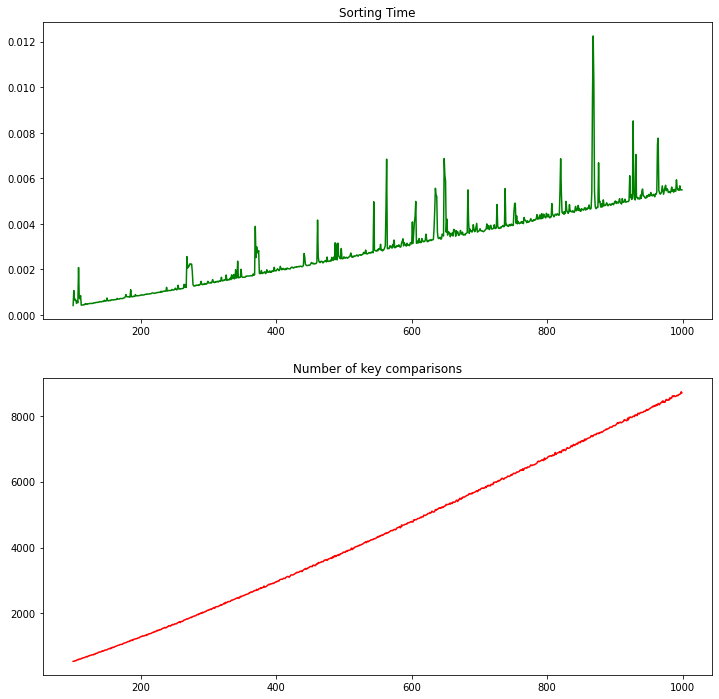

In [ ]:
time = []
kc = []
for i in range(100,1000,+1):
    count = [0]
    index = i
    arr = random.sample(range(0,index), index)
    start = datetime.now()
    mergeSort(arr, count)
    time.append((datetime.now()-start).total_seconds())
    kc.append(count[0])
x = np.arange(100,1000)

f, axes = plt.subplots(2, figsize=(12, 12))
axes[0].plot(x, time, color='g')
axes[0].set_title("Sorting Time")

#Number of Key Comparisons
axes[1].plot(x, kc, color='r')
axes[1].set_title("Number of key comparisons")
plt.show()

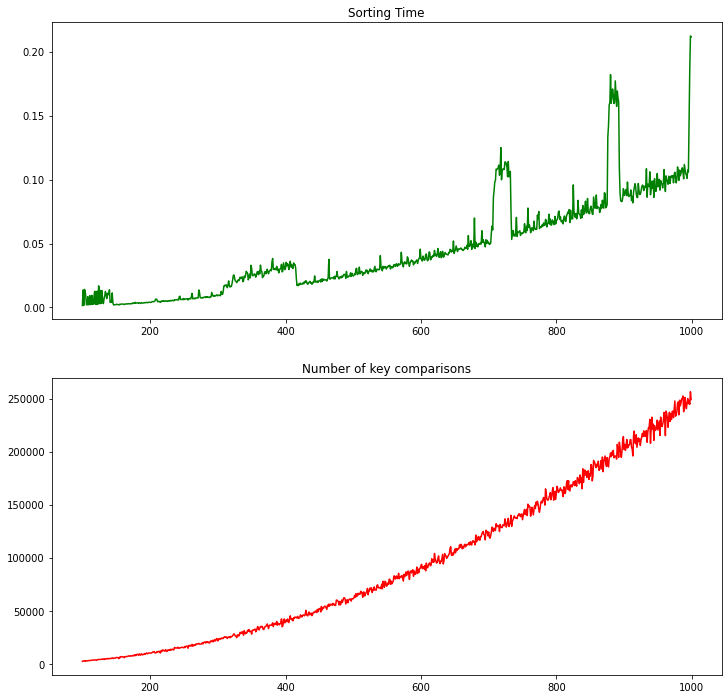

In [ ]:
time = []
kc = []
for i in range(100,1000,+1):
    count = [0]
    index = i
    arr = random.sample(range(0,index), index)
    start = datetime.now()
    insertionSort(arr, count)
    time.append((datetime.now()-start).total_seconds())
    kc.append(count[0])
x = np.arange(100,1000)

f, axes = plt.subplots(2, figsize=(12, 12))
axes[0].plot(x, time, color='g')
axes[0].set_title("Sorting Time")

#Number of Key Comparisons
axes[1].plot(x, kc, color='r')
axes[1].set_title("Number of key comparisons")
plt.show()

##Difference in time complexity for MergeSort (red) and InsertionSort (green)

From the combined graph below, we can see how the two graphs differ in terms of running time for datasets with sizes 0 to 1000.

This follows the theory that we have learned in lectures, where, discounting outliers, the time complexity of insertion sort resembles a n^2 time complexity on average case, while the time complexity of merge sort resembles nlogn on average case.

In [ ]:
insertion_time = []
merge_time = []
insertion_kc = []
merge_kc = []
for i in range(0,1000,+1):
    index = i
    count = [0]
    arr = random.sample(range(0,index), index)
    start = datetime.now()
    insertionSort(arr, count)
    insertion_time.append((datetime.now()-start).total_seconds())
    insertion_kc.append(count[0])
    count = [0]
    start = datetime.now()
    mergeSort(arr, count)
    merge_time.append((datetime.now()-start).total_seconds())
    merge_kc.append(count[0])
x = np.arange(0,1000)
f, axes = plt.subplots(2, figsize=(18, 12))
axes[0].plot(x, insertion_time, color='g')
axes[0].plot(x, merge_time, color='r')
axes[0].set_title("Sorting Time")

#Number of Key Comparisons
axes[1].plot(x, insertion_kc, color='g')
axes[1].plot(x, merge_kc, color='r')
axes[1].set_title("Number of key comparisons")
plt.show()

##ci: Constant S value

S value set at 500 for 1000 arrays with increasing size

From the graph, discounting any anomalies, we can see how there is a clear division between the arrays below 500 elements and those with more than 500 elements.

This is observed as those arrays with length 500 and below would immediately be chosen to be sorted via insertion sort, which is much slower than merge sort and has an observable time complexity of n^2 

On the other hand, for arrays with length 501 and above, there was a chance to run mergeSort once. This greatly reduced the execution time for the code, as observed by the large drop in time taken from 500 to 501. This reduction in execution time is observed for all arrays (excluding outliers) from 501 to 1000

While the observed graph for arrays with length 501 and above might not have have an observable nlogn shape to them, it is still consistant with what is taught in the lectures as the insertion sort still dominates the time complexity for such a large value of S.

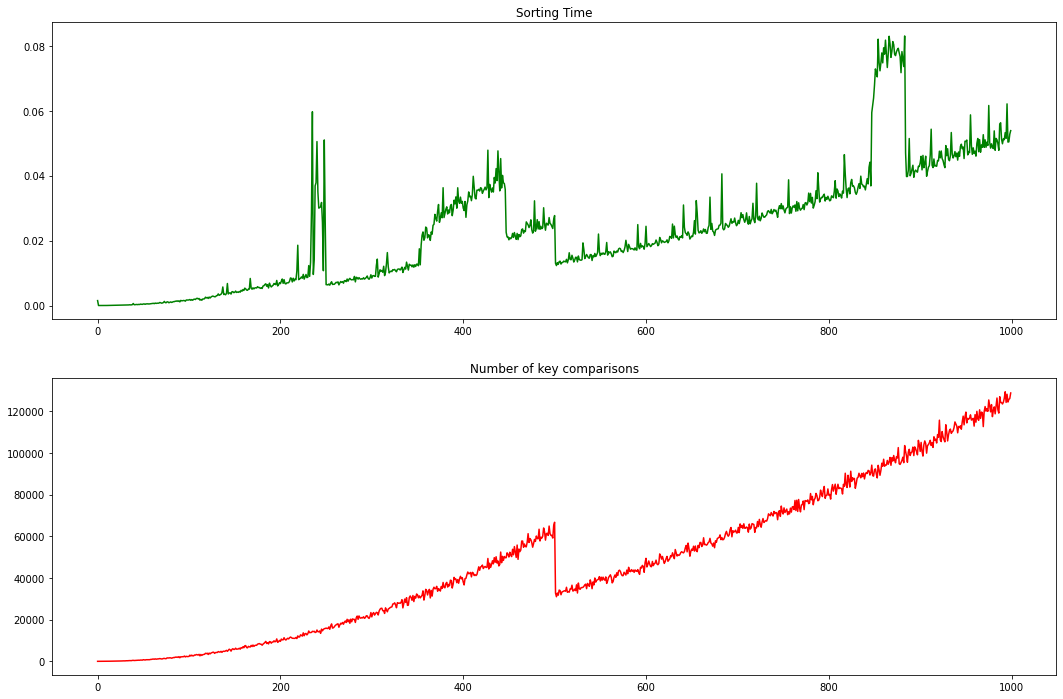

In [ ]:
time = []
kc = []
for i in range(0,1000,+1):
    index = i
    count = [0]
    arr = random.sample(range(0,index), index)
    start = datetime.now()
    hybridSort(arr, 500, count)
    time.append((datetime.now()-start).total_seconds())
    kc.append(count[0])
x = np.arange(0,1000)
f, axes = plt.subplots(2, figsize=(18, 12))
axes[0].plot(x, time, color='g')
axes[0].set_title("Sorting Time")

#Number of Key Comparisons
axes[1].plot(x, kc, color='r')
axes[1].set_title("Number of key comparisons")
plt.show()

##Smaller S value of 10

Observe a smaller S value. the jumps in execution time are less visible and the graph starts to resemble that of a completely mergeSort graph. This is to be expected as mergeSort() is called more often before insertionSort is called. Hence the graph will resemble less that of one with n^2 time complexity and more of one with nlogn time complexity

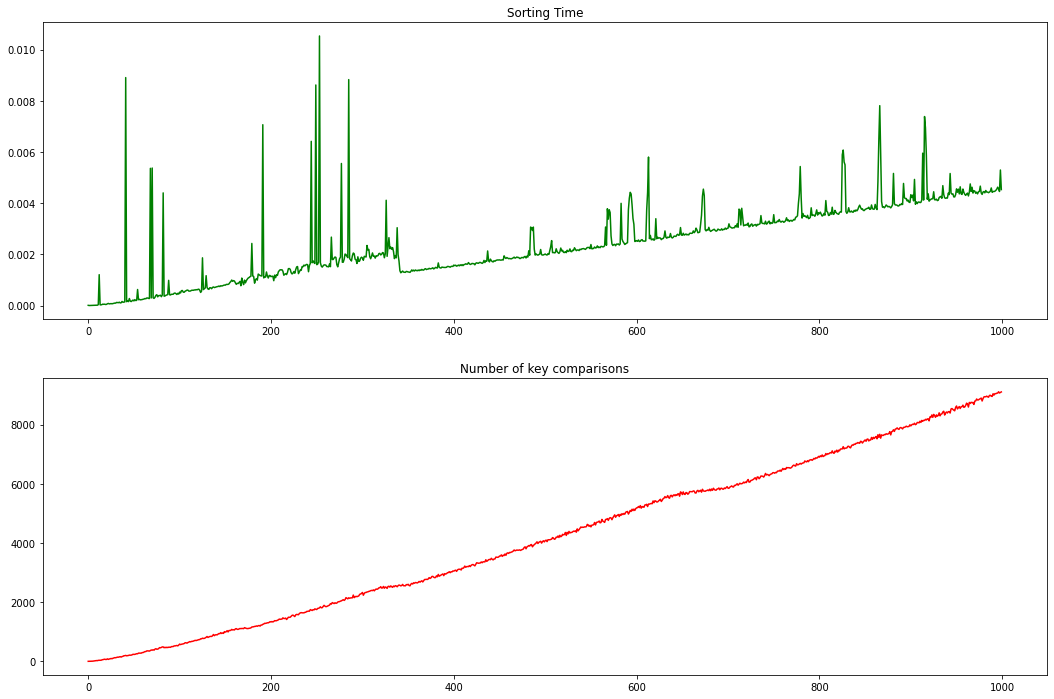

In [ ]:
time = []
kc = []
for i in range(0,1000,+1):
    index = i
    count = [0]
    arr = random.sample(range(0,index), index)
    start = datetime.now()
    hybridSort(arr, 10, count)
    time.append((datetime.now()-start).total_seconds())
    kc.append(count[0])
x = np.arange(0,1000)
f, axes = plt.subplots(2, figsize=(18, 12))
axes[0].plot(x, time, color='g')
axes[0].set_title("Sorting Time")

#Number of Key Comparisons
axes[1].plot(x, kc, color='r')
axes[1].set_title("Number of key comparisons")
plt.show()

##Comparing graphs of various S values for randomly generated datasets with length 0-1000

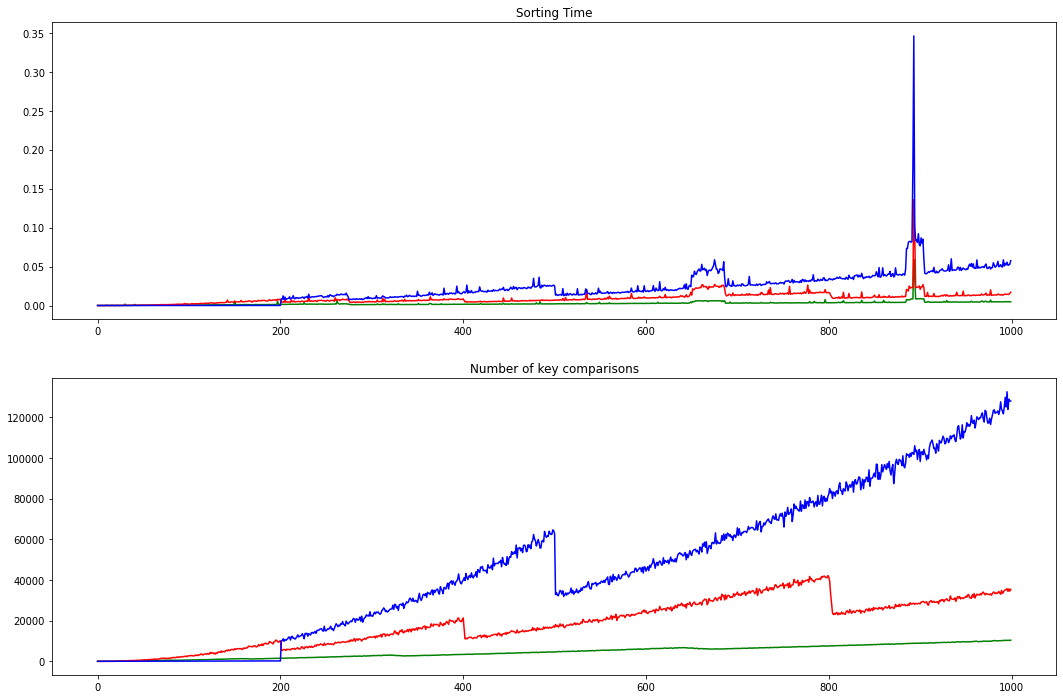

In [ ]:
smallS_time = []
medS_time = []
largeS_time = []
small_kc = []
med_kc = []
large_kc = []
for i in range(0,1000,+1):
    index = i
    count = [0]
    arr = random.sample(range(0,index), index)
    start = datetime.now()
    hybridSort(arr, 20, count)
    smallS_time.append((datetime.now()-start).total_seconds())
    small_kc.append(count[0])
    count = [0]
    start = datetime.now()
    hybridSort(arr, 200, count)
    medS_time.append((datetime.now()-start).total_seconds())
    med_kc.append(count[0])
    count = [0]
    start = datetime.now()
    hybridSort(arr, 500, count)
    largeS_time.append((datetime.now()-start).total_seconds())
    large_kc.append(count[0])
x = np.arange(0,1000)
f, axes = plt.subplots(2, figsize=(18, 12))
axes[0].plot(x, smallS_time, color='g')
axes[0].plot(x, medS_time, color='r')
axes[0].plot(x, largeS_time, color='b')
axes[0].set_title("Sorting Time")

#Number of Key Comparisons
axes[1].plot(x, small_kc, color='g')
axes[1].plot(x, med_kc, color='r')
axes[1].plot(x, large_kc, color='b')
axes[1].set_title("Number of key comparisons")
plt.show()

# cii. Fixed input size

We shall choose the array of size 2000 for an array of sufficiently large size. This limit was chosen while considering the fact that the optimal S should be "sufficiently" small.


In [ ]:
n_size_arrays[2000] = random.sample(range(0,2000), 2000)
n_size_arrays[100] = random.sample(range(0,100), 100)

In [ ]:
cii_arr = n_size_arrays[2000]
start = datetime.now()
hybridSort(cii_arr, 50)
end = datetime.now()
print("Time taken: {}".format((end-start).total_seconds()))

TypeError: ignored

In [ ]:
import math
def cii(arr_size, step):
  #Hybrid Sort
  hs_time = {}
  fastest = 1 
  fastest_limit = 0

  hs_kc = {}
  least_kc = math.inf
  least_kc_limit = 0

  #Merge Sort
  ms_time = {}
  ms_kc = {}

  for i in range(1, arr_size, step):
    """
    Hybrid Sort
    """
    #Copy array to ensure that each hybrid sort iteration will sort in the same order
    cii_arr = n_size_arrays[arr_size] 

    #Sorting Process
    count = [0]
    start = datetime.now()
    hybridSort(cii_arr, i, count)
    end = datetime.now()

    #Recording time 
    time_elapsed = (end-start).total_seconds()
    hs_time[i] = (time_elapsed)

    #Recording Key comp
    hs_kc[i] = count[0]
    

    if time_elapsed < fastest:
      fastest = time_elapsed
      fastest_limit = i

    if count[0] < least_kc:
      least_kc = count[0]
      least_kc_limit = i

    """
    Merge Sort
    """
    cii_arr = n_size_arrays[arr_size] 
    count = [0]

    start = datetime.now()
    mergeSort(cii_arr, count)
    end = datetime.now()

    #Recording time 
    time_elapsed = (end-start).total_seconds()
    ms_time[i] = time_elapsed

    #Recording Key comp
    ms_kc[i] = count[0]

    
  #Hybrid Sort
  hs_time_list = sorted(hs_time.items()) # sorted by key, return a list of tuples
  hs_kc_list = sorted(hs_kc.items()) 
  hs_tx, hs_ty = zip(*hs_time_list) # unpack a list of pairs into two tuples
  hs_kx, hs_ky = zip(*hs_kc_list) 
  
  #Merge Sort
  ms_time_list = sorted(ms_time.items()) 
  ms_kc_list = sorted(ms_kc.items())
  ms_tx, ms_ty = zip(*ms_time_list) 
  ms_kx, ms_ky = zip(*ms_kc_list) 
  


  f, axes = plt.subplots(2, figsize=(28, 12))
  #Sorting Time
  axes[0].plot(hs_tx, hs_ty, color='g')
  axes[0].plot(ms_tx, ms_ty, color='r')
  axes[0].set_title("Sorting Time")

  #Number of Key Comparisons
  axes[1].plot(hs_kx, hs_ky, color='g')
  axes[1].plot(ms_kx, ms_ky, color='r')
  axes[1].set_title("Number of key comparisons")
  plt.show()

  print("Fastest sort time:", fastest,"\tLeast key comparison:", least_kc)
  print("Limit S used:", fastest_limit,"\t\tLimit S used:", least_kc_limit)

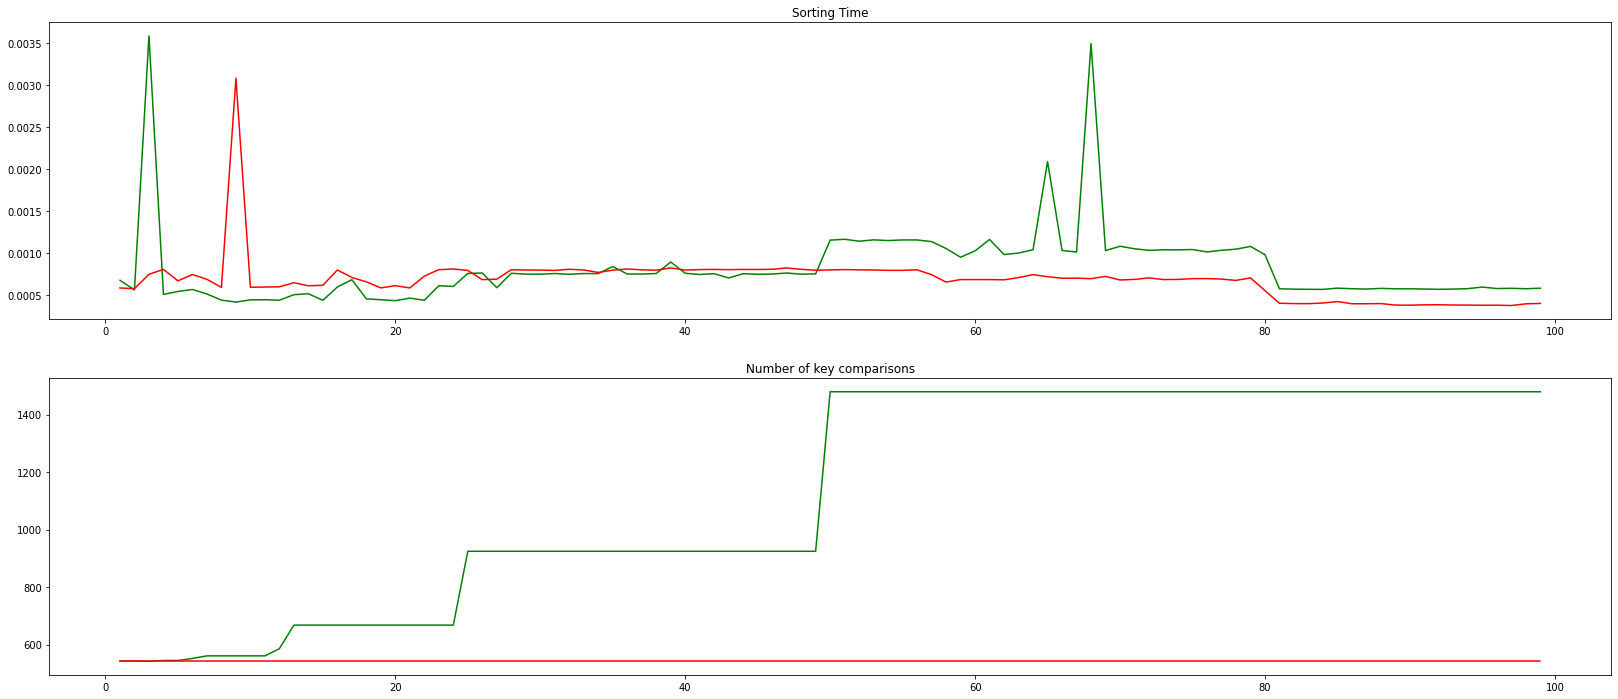

Fastest sort time: 0.000417 	Least key comparison: 542
Limit S used: 9 		Limit S used: 3


In [ ]:
cii(100,1)

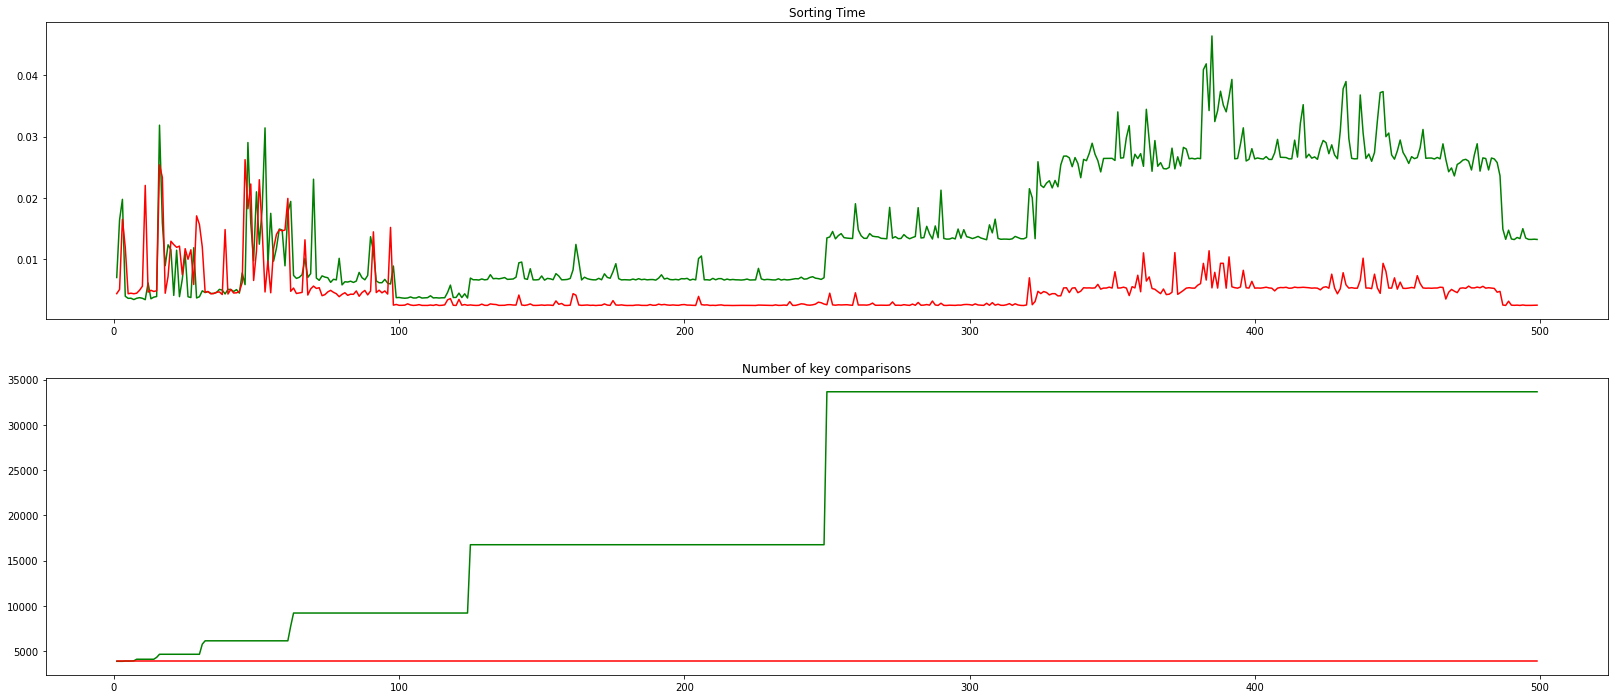

Fastest sort time: 0.003403 	Least key comparison: 3859
Limit S used: 11 		Limit S used: 3


In [ ]:
cii(500,1)

Empirical evidence 
--
- In the range [1,k], where k is a sufficiently small number, number of key comparisons and sorting time decreases as S increases
- In the range [k,n), where n fixed input size, number of key comparisons and sorting time increases as S increases


Theoretical Analysis of time complexity 
--
- Insertion sort time complexity: O(n^2)
- Merge sort time complexity: O(n logn)
- Insertion sort is effective when n is sufficiently small and merge sort is effective when n is sufficiently large
- Hybrid algorithm to switch from merge to insertion sort at a optimal value of S is faster than Merge Sort 
- Hybrid sort time complexity: O(n logn)

As such, the empicial evidence is able to support the theoretical analysis of hybrid sort's time complexity



In [ ]:
keyCmpArr = []
timeArr = []
lowestTime = 0
lowestKeyCmp = 0
keyCmp = [0]
arraySize = 10000

mainArr = random.sample(range(0,arraySize), arraySize)

for index in range(1,arraySize):
    arr = mainArr[:index]
    for s_val in range(1,30):
      start = datetime.now()
      hybridSort(arr, s_val, keyCmp)
      timeTaken = (datetime.now()-start).total_seconds()
      if timeTaken < lowestTime:
        timeArr.append(s_val)
        lowestTime = timeTaken
      if keyCmp[0] < lowestKeyCmp:
        keyCmpArr.append(s_val)
        lowestKeyCmp = keyCmp[0]

x = np.arange(0,arraySize)
plt.plot(mainArr,keyCmpArr, color='g')
plt.plot(mainArr,timeArr, color='r')
plt.show()

NameError: ignored

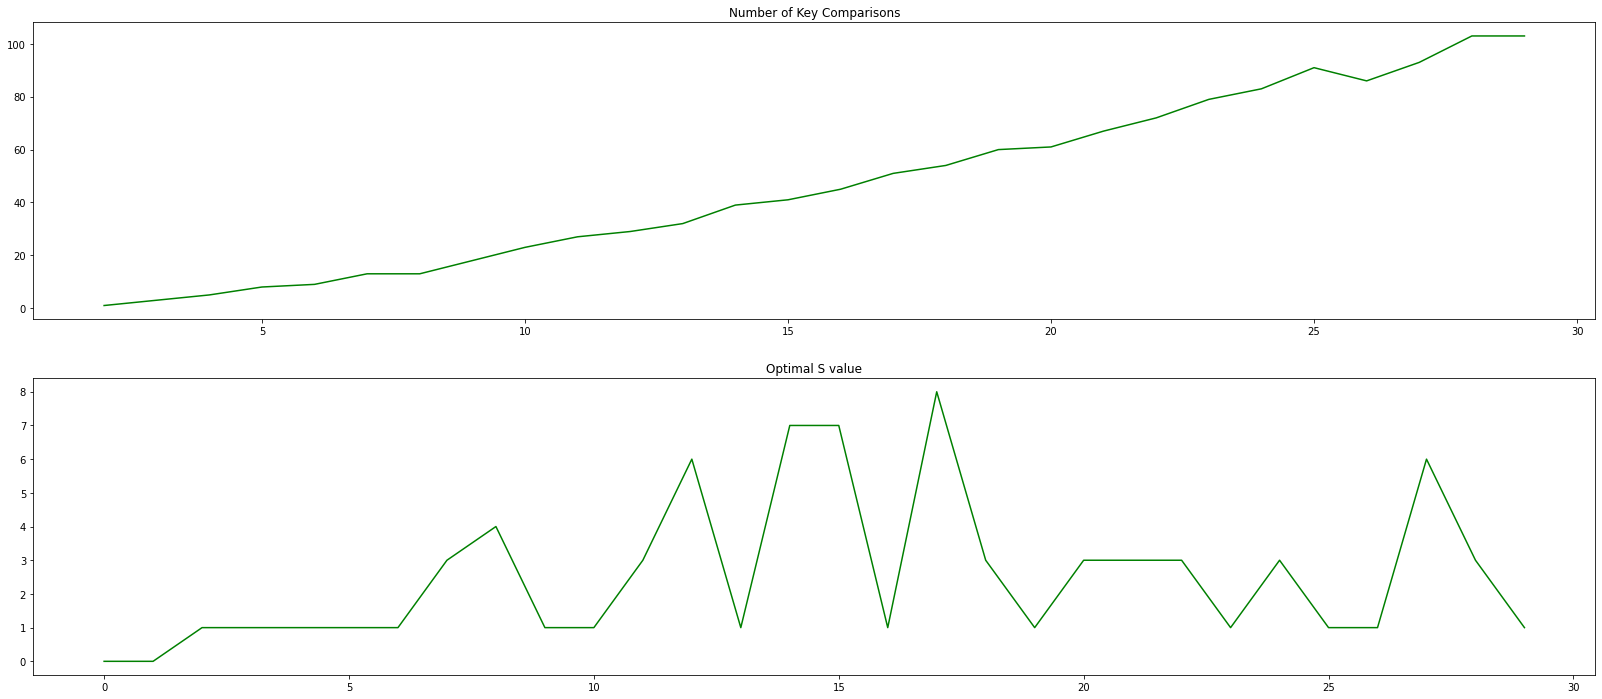

In [ ]:
kc_min = []
s_limit = []
for j in range(0, 30, +1): 
  #Hybrid Sort
  fastest = 1 
  fastest_limit = 0

  least_kc = math.inf
  least_kc_limit = 0

  arr = random.sample(range(0,j), j)

  for i in range(1, j, +1):
    """
    Hybrid Sort
    """

    #Sorting Process
    count = [0]
    start = datetime.now()
    hybridSort(arr, i, count)
    end = datetime.now()

    #Recording time 
    time_elapsed = (end-start).total_seconds()


    if count[0] < least_kc:
      least_kc = count[0]
      least_kc_limit = i

  kc_min.append(least_kc)
  s_limit.append(least_kc_limit)

x = np.arange(0,30)
f, axes = plt.subplots(2, figsize=(28, 12))
#Sorting Time
axes[0].plot(x, kc_min, color='g')
axes[0].set_title("Number of Key Comparisons")

#Number of Key Comparisons
axes[1].plot(x, s_limit, color='g')
axes[1].set_title("Optimal S value")
plt.show()